In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#CAMBIAR POR LA RUTA DE LOS ARCHIVOS EN TU DRIVE
extracted_features_1_1500 = pd.read_csv("/content/drive/MyDrive/TFM_Javier_Eneritz/DATOS_TFM/extracted_0-1500_eff_wl_sym5.csv")

extracted_features_1501_4500 = pd.read_csv("/content/drive/MyDrive/TFM_Javier_Eneritz/DATOS_TFM/extracted_1501-4500_eff_wl_sym5.csv")

extracted_features_4501_7328 = pd.read_csv("/content/drive/MyDrive/TFM_Javier_Eneritz/DATOS_TFM/extracted_4500-7508_eff_wl_sym5.csv")

extracted_features_1_1500.rename(columns = {'Unnamed: 0':''}, inplace = True)
extracted_features_1501_4500.rename(columns = {'Unnamed: 0':''}, inplace = True)
extracted_features_4501_7328.rename(columns = {'Unnamed: 0':''}, inplace = True)
extracted_features_1_1500 = extracted_features_1_1500.set_index('')
extracted_features_1501_4500 = extracted_features_1501_4500.set_index('')
extracted_features_4501_7328 = extracted_features_4501_7328.set_index('')

#CAMBIADO
# extracted_features_total = extracted_features_1_1500.append(extracted_features_1501_4500, ignore_index=True)
# extracted_features_total = extracted_features_total.append(extracted_features_4501_7328, ignore_index=True)
#AÑADIDO
extracted_features_total = pd.concat(
    [extracted_features_1_1500, extracted_features_1501_4500, extracted_features_4501_7328],
    ignore_index=True
)

In [ ]:
# print(extracted_features_total)

In [ ]:
extracted_features_total
extracted_features_total.index = extracted_features_total.index + 1

In [ ]:
#CAMBIAR POR LA RUTA DE LOS ARCHIVOS EN TU DRIVE
y_fold_1_1500 = pd.read_csv("/content/drive/MyDrive/TFM_Javier_Eneritz/DATOS_TFM/y_0-1500_eff_wl_sym5.csv")

y_fold_1501_4500 = pd.read_csv("/content/drive/MyDrive/TFM_Javier_Eneritz/DATOS_TFM/y_1501-4500_eff_wl_sym5.csv")

y_fold_4501_7508 = pd.read_csv("/content/drive/MyDrive/TFM_Javier_Eneritz/DATOS_TFM/y_4501-7508_eff_wl_sym5.csv")

y_fold_1_1500.rename(columns = {'Unnamed: 0':''}, inplace = True)
y_fold_1501_4500.rename(columns = {'Unnamed: 0':''}, inplace = True)
y_fold_4501_7508.rename(columns = {'Unnamed: 0':''}, inplace = True)
y_fold_1_1500 = y_fold_1_1500.set_index('')
y_fold_1501_4500 = y_fold_1501_4500.set_index('')
y_fold_4501_7508 = y_fold_4501_7508.set_index('')
y_fold_1_1500 = y_fold_1_1500.squeeze()
y_fold_1501_4500 = y_fold_1501_4500.squeeze()
y_fold_4501_7508 = y_fold_4501_7508.squeeze()

In [ ]:
y_fold_1_1500

,0
,
1,True
2,True
3,False
4,True
5,True
...,...
1496,True
1497,True
1498,True


In [ ]:
y_fold_1501_4500

,0
,
1501,True
1502,True
1503,True
1504,True
1505,True
...,...
4496,False
4497,False
4498,False


In [ ]:
y_fold_4501_7508

,0
,
4501,False
4502,True
4503,False
4504,False
4505,False
...,...
7504,False
7505,False
7506,False


In [ ]:
##CAMBIADO
# y = y_fold_1_1500.append(y_fold_1501_4500, ignore_index=True)
# y = y.append(y_fold_4501_7508, ignore_index=True)

#AÑADIDO
y = pd.concat([y_fold_1_1500, y_fold_1501_4500, y_fold_4501_7508], ignore_index=True)

y.index = y.index + 1

In [ ]:
y

,0
1,True
2,True
3,False
4,True
5,True
...,...
7324,False
7325,False
7326,False
7327,False


In [ ]:
y.value_counts()

,count
0,
False,4681
True,2647


In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(extracted_features_total)
features_filtered = select_features(extracted_features_total, y) ##Elimina características irrelevantes o ruidosas que no ayudan al modelo a predecir correctamente.


/usr/local/lib/python3.11/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EVEN__query_similarity_count__query_None__threshold_0.0'
 'ODD__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [ ]:
features_filtered

,EVEN__number_cwt_peaks__n_5,"ODD__agg_autocorrelation__f_agg_""median""__maxlag_40","EVEN__agg_autocorrelation__f_agg_""median""__maxlag_40","ODD__agg_autocorrelation__f_agg_""var""__maxlag_40",ODD__number_cwt_peaks__n_5,"EVEN__agg_autocorrelation__f_agg_""var""__maxlag_40",EVEN__number_peaks__n_5,ODD__number_peaks__n_5,EVEN__partial_autocorrelation__lag_2,ODD__spkt_welch_density__coeff_8,...,"ODD__fft_coefficient__attr_""real""__coeff_34","ODD__matrix_profile__feature_""min""__threshold_0.98","EVEN__matrix_profile__feature_""min""__threshold_0.98","EVEN__cwt_coefficients__coeff_12__w_5__widths_(2, 5, 10, 20)","EVEN__cwt_coefficients__coeff_6__w_5__widths_(2, 5, 10, 20)",EVEN__large_standard_deviation__r_0.15000000000000002,"ODD__cwt_coefficients__coeff_11__w_2__widths_(2, 5, 10, 20)","ODD__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.8",EVEN__fourier_entropy__bins_100,"ODD__cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20)"
1,449.0,0.314642,0.366400,0.005386,438.0,0.004982,362.0,368.0,0.390279,5.672898e-08,...,-0.003658,3.024707,2.919389,0.260102,1.135707,1.0,-0.000017,2.506051e-06,1.633048,0.170570
2,360.0,0.686171,0.700863,0.014289,349.0,0.012857,294.0,285.0,-0.436383,4.234967e-07,...,0.102285,4.152356,7.225938,0.260469,1.136143,1.0,-0.000068,-1.258322e-07,0.866813,0.170342
3,171.0,-0.026751,-0.039734,0.022909,201.0,0.029035,218.0,219.0,-0.569200,5.589114e-06,...,-0.133636,4.522290,4.305525,0.262508,1.136978,0.0,-0.000428,-4.113450e-06,2.226481,0.170344
4,398.0,0.420401,0.353016,0.006350,404.0,0.006244,388.0,400.0,0.182401,2.444841e-07,...,0.014081,3.409224,1.437199,0.259933,1.135722,0.0,-0.000128,2.788600e-05,1.684695,0.170020
5,407.0,-0.017667,0.003496,0.011583,457.0,0.012077,398.0,366.0,0.187463,3.846883e-07,...,0.014201,2.446953,2.274871,0.259963,1.135747,0.0,0.000037,-5.452814e-06,3.072249,0.170486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7324,301.0,0.422281,0.429219,0.041973,295.0,0.039519,185.0,178.0,-0.946626,2.021904e-07,...,-0.013810,1.755265,1.732742,0.259841,1.135183,0.0,0.000129,4.701792e-07,0.867297,0.170621
7325,475.0,0.138210,0.148990,0.000969,505.0,0.001342,369.0,363.0,0.183780,2.110136e-08,...,-0.007180,1.792300,2.083890,0.260169,1.135686,0.0,0.000075,-1.514264e-05,2.486090,0.170716
7326,252.0,-0.026534,-0.020710,0.191372,256.0,0.203217,323.0,320.0,-0.678219,6.823481e-08,...,0.006289,3.094126,3.954714,0.261415,1.134724,1.0,-0.001443,1.207966e-05,0.664454,0.168948
7327,428.0,0.291725,0.250764,0.003087,429.0,0.002259,397.0,342.0,0.276637,8.435485e-08,...,-0.001685,1.682306,3.766119,0.260194,1.136094,1.0,0.000205,6.706216e-06,1.740794,0.170704


In [ ]:
y.value_counts()

,count
0,
False,4681
True,2647


In [ ]:
/content/drive/MyDrive/TFM_Javier_Eneritz/DATOS_TFM/extracted_4500-7508_eff_wl_sym5.csv

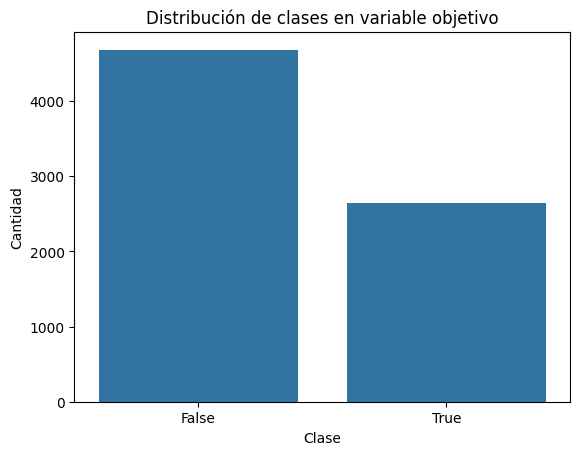

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y)
plt.title('Distribución de clases en variable objetivo')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

Decission tree (trabajo luis, como ejemplo)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
X_full_train, X_full_test, y_train, y_test = train_test_split(extracted_features_total, y, test_size=.3)
X_filtered_train, X_filtered_test = X_full_train[features_filtered.columns], X_full_test[features_filtered.columns]

In [ ]:
print(X_full_test)

      EVEN__variance_larger_than_standard_deviation  EVEN__has_duplicate_max  \
419                                             0.0                      0.0   
321                                             0.0                      0.0   
2523                                            0.0                      0.0   
1450                                            0.0                      0.0   
834                                             0.0                      0.0   
...                                             ...                      ...   
67                                              0.0                      0.0   
2638                                            0.0                      0.0   
4229                                            0.0                      0.0   
6855                                            0.0                      0.0   
4775                                            0.0                      0.0   

      EVEN__has_duplicate_min  EVEN__ha

In [ ]:
classifier_full = DecisionTreeClassifier()
classifier_full.fit(X_full_train, y_train)
predictions = classifier_full.predict(X_full_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.76      0.76      0.76      1414
        True       0.57      0.57      0.57       785

    accuracy                           0.69      2199
   macro avg       0.67      0.67      0.67      2199
weighted avg       0.69      0.69      0.69      2199



In [ ]:
y_test.value_counts()

,count
0,
False,1414
True,785


In [ ]:
y_test

,0
419,True
321,False
2523,False
1450,True
834,False
...,...
67,False
2638,True
4229,False
6855,False


In [ ]:
predictions.sum()

np.int64(792)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[1,1])
print('\nTrue Negatives(TN) = ', cm[0,0])
print('\nFalse Positives(FP) = ', cm[1,0])
print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[1072  342]
 [ 335  450]]

True Positives(TP) =  450

True Negatives(TN) =  1072

False Positives(FP) =  335

False Negatives(FN) =  342


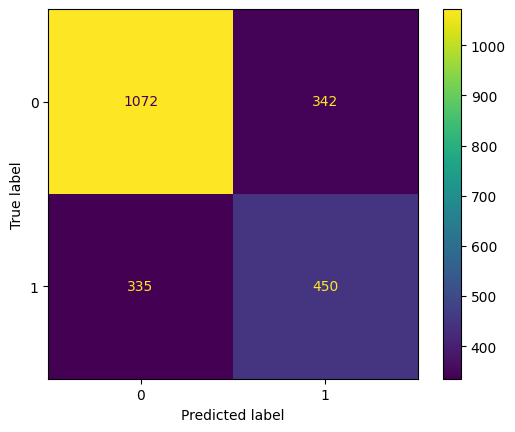

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='weighted')

0.6924341000861426

In [ ]:
classifier_filtered = DecisionTreeClassifier()
classifier_filtered.fit(X_filtered_train, y_train)
predictions_filtered = classifier_filtered.predict(X_filtered_test)
print(classification_report(y_test, predictions_filtered))

              precision    recall  f1-score   support

       False       0.78      0.76      0.77      1414
        True       0.59      0.61      0.60       785

    accuracy                           0.71      2199
   macro avg       0.68      0.68      0.68      2199
weighted avg       0.71      0.71      0.71      2199



In [ ]:
cm = confusion_matrix(y_test, predictions_filtered)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[1,1])
print('\nTrue Negatives(TN) = ', cm[0,0])
print('\nFalse Positives(FP) = ', cm[1,0])
print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[1076  338]
 [ 308  477]]

True Positives(TP) =  477

True Negatives(TN) =  1076

False Positives(FP) =  308

False Negatives(FN) =  338


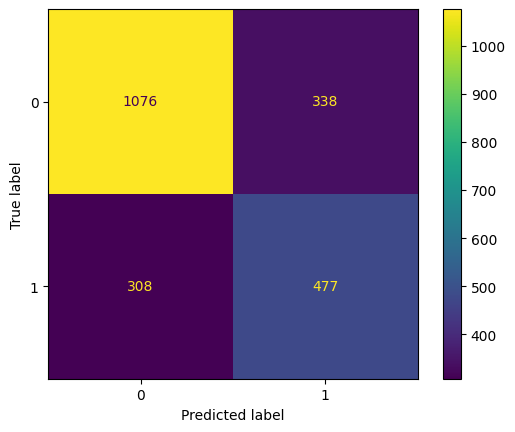

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions_filtered, average='weighted')

0.7074093051426001

Exploración de los datos en el espacio de características

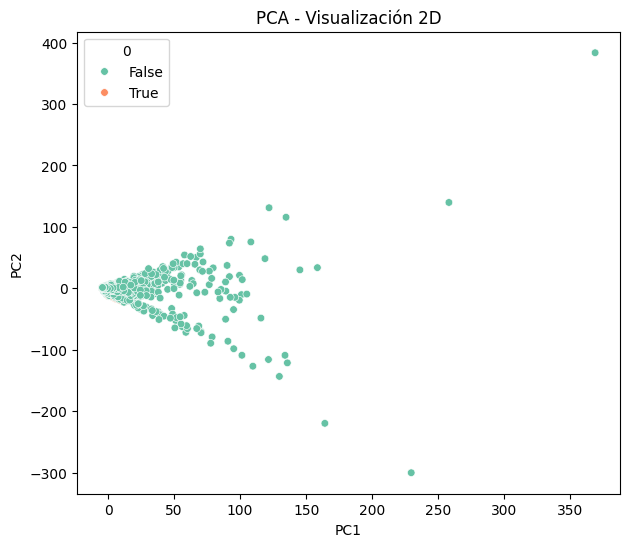

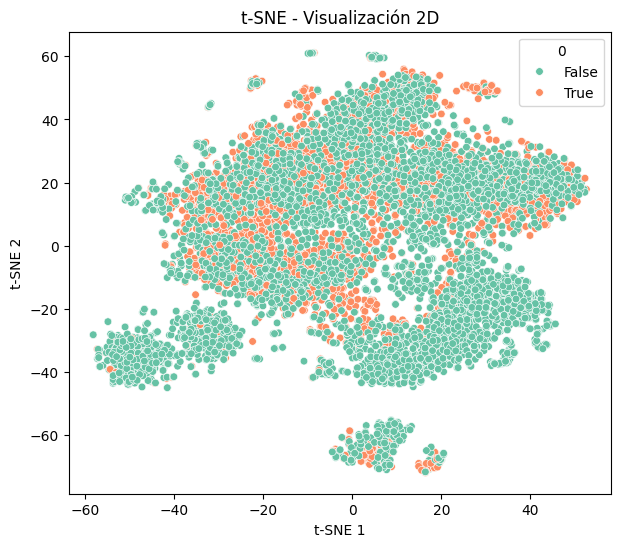

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


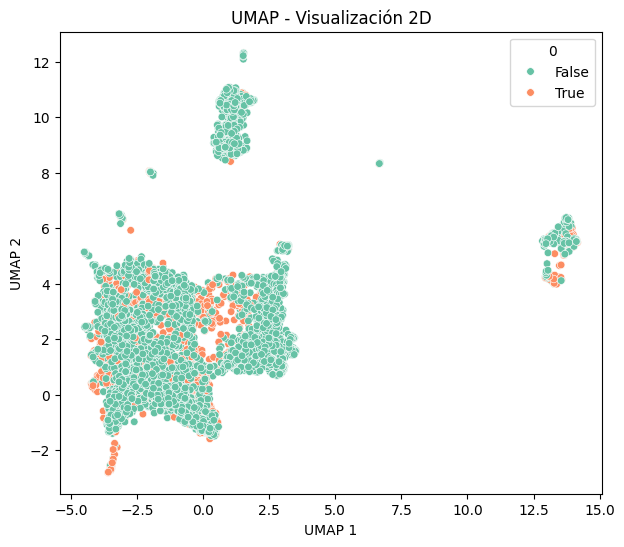

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

#Normalizacion
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(extracted_features_total)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(7, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', s=30)
plt.title("PCA - Visualización 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(7, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set2', s=30)
plt.title("t-SNE - Visualización 2D")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


# UMAP
try:
    import umap.umap_ as umap
    reducer = umap.UMAP(n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X_scaled)
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='Set2', s=30)
    plt.title("UMAP - Visualización 2D")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.show()
except ImportError:
    print("UMAP no está instalado. Puedes instalarlo con: pip install umap-learn")

In [ ]:
# from sklearn.manifold import MDS

# # MDS
# mds = MDS(n_components=2, random_state=42, dissimilarity='euclidean')
# X_mds = mds.fit_transform(X_scaled)

# plt.figure(figsize=(7, 6))
# sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], hue=y, palette='Set2', s=30)
# plt.title("MDS - Visualización 2D")
# plt.xlabel("MDS 1")
# plt.ylabel("MDS 2")
# plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


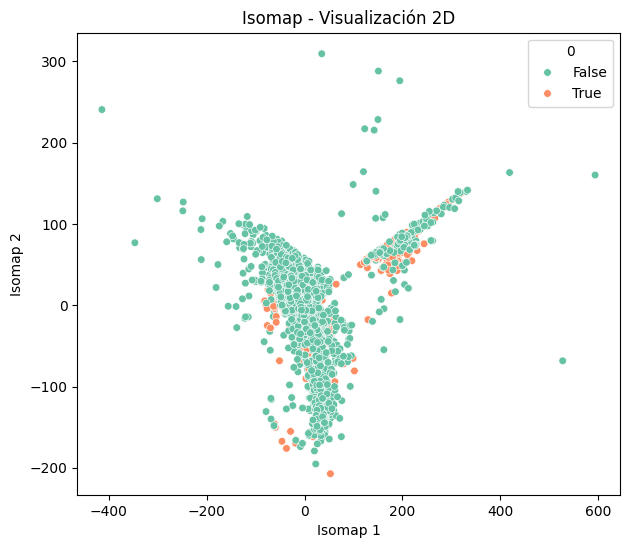

In [ ]:
from sklearn.manifold import Isomap

# ISOMAP
isomap = Isomap(n_components=2, n_neighbors=5)  # Puedes ajustar n_neighbors según tus datos
X_isomap = isomap.fit_transform(X_scaled)

plt.figure(figsize=(7, 6))
sns.scatterplot(x=X_isomap[:, 0], y=X_isomap[:, 1], hue=y, palette='Set2', s=30)
plt.title("Isomap - Visualización 2D")
plt.xlabel("Isomap 1")
plt.ylabel("Isomap 2")
plt.show()


 Visualización con solo el 10% de las etiquetas

/tmp/ipython-input-34-2791793359.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False  True  True False False  True False False  True False False False
 False  True False  True False False  True  True  True False False False
  True False False False  True False False False False  True False False
 False  True False  True  True False False  True False False False  True
 False False  True False False  True  True False False  True  True False
 False False False False False False False  True False  True  True False
 False False False False  True False  True  True False False False False
 False  True False False False False  True False False  True  True  True
  True  True False False  True  True  True False False False False  True
 False False  True False False False  True False False  True False  True
  True False  True  True False  True  True False False False False False
 False False False False  Tr

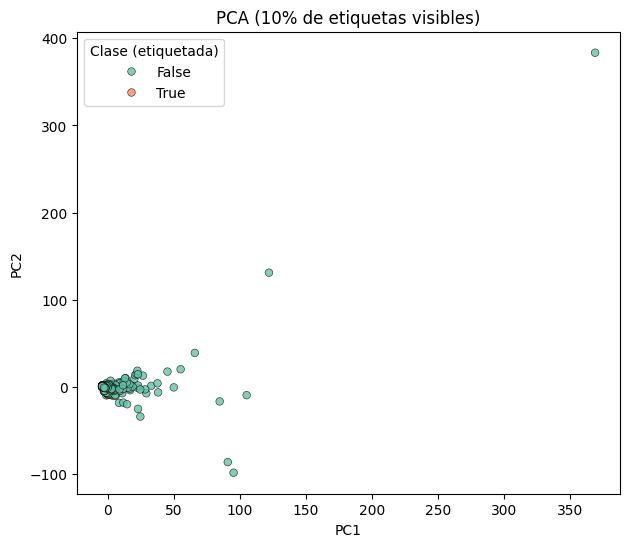

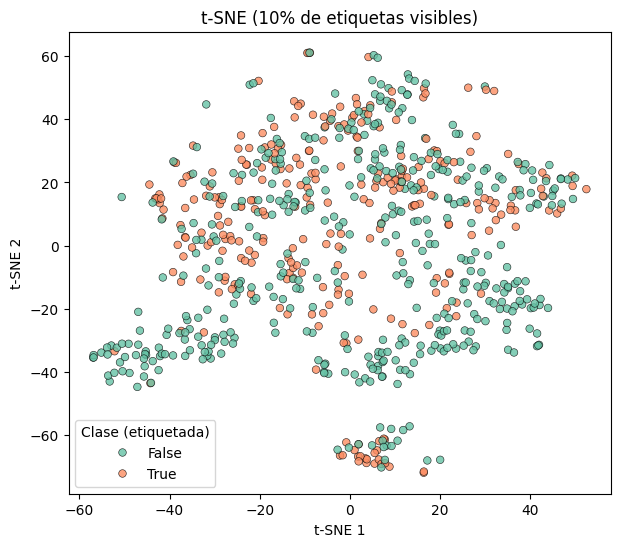

In [ ]:
import numpy as np

# Porcentaje de datos etiquetados
label_fraction = 0.10
n_total = len(y)
n_labeled = int(n_total * label_fraction)

# Selección aleatoria del 10% de índices etiquetados
np.random.seed(42)
labeled_indices = np.random.choice(n_total, n_labeled, replace=False)

# Crear una serie con etiquetas parciales (NaN en los no etiquetados)
y_partial = pd.Series(data=[np.nan]*n_total)
y_partial.iloc[labeled_indices] = y.iloc[labeled_indices]

# Visualización en PCA con sólo las etiquetas conocidas
plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y_partial,
    palette='Set2',
    s=30,
    alpha=0.8,
    edgecolor='k',
)
plt.title("PCA (10% de etiquetas visibles)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Clase (etiquetada)", loc='best')
plt.show()

# Visualización en t-SNE con sólo las etiquetas conocidas
plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=y_partial,
    palette='Set2',
    s=30,
    alpha=0.8,
    edgecolor='k',
)
plt.title("t-SNE (10% de etiquetas visibles)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Clase (etiquetada)", loc='best')
plt.show()


FixMatch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# === Preprocesamiento ===
X = features_filtered.values.astype(np.float32)
y_array = y.values  # y ya está concatenado

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División semisupervisada: 10% con etiqueta, 90% sin
X_lab, X_unl, y_lab, y_unl = train_test_split(
    X_scaled, y_array, train_size=0.1, stratify=y_array, random_state=42
)
y_unl[:] = -1  # sin etiqueta

X_combined = np.concatenate([X_lab, X_unl])
y_combined = np.concatenate([y_lab, y_unl])


In [ ]:
print(features_filtered)

      EVEN__number_cwt_peaks__n_5  \
1                           449.0   
2                           360.0   
3                           171.0   
4                           398.0   
5                           407.0   
...                           ...   
7324                        301.0   
7325                        475.0   
7326                        252.0   
7327                        428.0   
7328                        450.0   

      ODD__agg_autocorrelation__f_agg_"median"__maxlag_40  \
1                                              0.314642     
2                                              0.686171     
3                                             -0.026751     
4                                              0.420401     
5                                             -0.017667     
...                                                 ...     
7324                                           0.422281     
7325                                           0.138210     
7326  

In [ ]:
class SemiSupervisedDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = SemiSupervisedDataset(X_combined, y_combined)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.net(x)

n_classes = len(np.unique(y_array))
model = MLP(input_dim=X.shape[1], output_dim=n_classes).to("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:

#Otro modelo MLP
import torch.nn as nn

class DeepMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Dropout(0.4),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.model(x)




In [ ]:
## Entrenamiento con FixMatch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
confidence_threshold = 0.95

model = DeepMLP(input_dim=X.shape[1], output_dim=n_classes).to(device)

for epoch in range(30):
    model.train()
    total_loss = 0

    for xb, yb in dataloader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()

        # Separar etiquetados y no etiquetados
        mask_labeled = yb != -1
        xb_labeled = xb[mask_labeled]
        yb_labeled = yb[mask_labeled]

        xb_unlabeled = xb[~mask_labeled]

        # Pseudoetiquetado
        if len(xb_unlabeled) > 0:
            with torch.no_grad():
                logits_unl = model(xb_unlabeled)
                probs = F.softmax(logits_unl, dim=1)
                max_probs, pseudo_labels = torch.max(probs, dim=1)
                confident_mask = max_probs > confidence_threshold

                xb_pseudo = xb_unlabeled[confident_mask]
                yb_pseudo = pseudo_labels[confident_mask]

        # Cálculo de pérdida
        logits_labeled = model(xb_labeled)
        loss_labeled = loss_fn(logits_labeled, yb_labeled)

        if 'xb_pseudo' in locals() and len(xb_pseudo) > 0:
            logits_pseudo = model(xb_pseudo)
            loss_pseudo = loss_fn(logits_pseudo, yb_pseudo)
            loss = loss_labeled + loss_pseudo
        else:
            loss = loss_labeled

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {total_loss:.4f}")


Epoch 1 - Loss: 101.8269
Epoch 2 - Loss: 101.1869
Epoch 3 - Loss: 101.1335
Epoch 4 - Loss: 101.2229
Epoch 5 - Loss: 101.6160
Epoch 6 - Loss: 101.4173
Epoch 7 - Loss: 101.4612
Epoch 8 - Loss: 101.1745
Epoch 9 - Loss: 100.9455
Epoch 10 - Loss: 101.5298
Epoch 11 - Loss: 102.2784
Epoch 12 - Loss: 101.7008
Epoch 13 - Loss: 101.4988
Epoch 14 - Loss: 101.8476
Epoch 15 - Loss: 101.8743
Epoch 16 - Loss: 101.9848
Epoch 17 - Loss: 101.9204
Epoch 18 - Loss: 101.6898
Epoch 19 - Loss: 102.0711
Epoch 20 - Loss: 101.7658
Epoch 21 - Loss: 101.5578
Epoch 22 - Loss: 100.7399
Epoch 23 - Loss: 101.2437
Epoch 24 - Loss: 101.2747
Epoch 25 - Loss: 101.8986
Epoch 26 - Loss: 101.9581
Epoch 27 - Loss: 101.2682
Epoch 28 - Loss: 101.5913
Epoch 29 - Loss: 101.6535
Epoch 30 - Loss: 101.0307


evaluacion

In [ ]:
from sklearn.model_selection import train_test_split

# Solo datos con etiquetas reales
X_labeled_all = X_scaled[y_array != -1]
y_labeled_all = y_array[y_array != -1]

# 20% para test final
X_train_eval, X_test, y_train_eval, y_test = train_test_split(
    X_labeled_all, y_labeled_all, test_size=0.2, random_state=42, stratify=y_labeled_all
)



✅ Accuracy en test: 0.6139


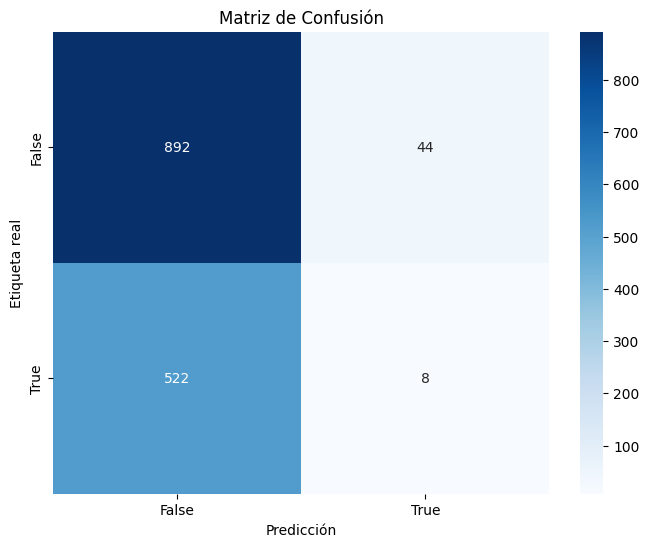


📊 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.63      0.95      0.76       936
           1       0.15      0.02      0.03       530

    accuracy                           0.61      1466
   macro avg       0.39      0.48      0.39      1466
weighted avg       0.46      0.61      0.49      1466



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Pasar a tensores
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Predicción
model.eval()
with torch.no_grad():
    logits = model(X_test_tensor)
    preds = torch.argmax(logits, dim=1)

# Convertir a CPU para evaluación
y_true = y_test_tensor.cpu().numpy()
y_pred = preds.cpu().numpy()

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"\n✅ Accuracy en test: {acc:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_array), yticklabels=np.unique(y_array))
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte detallado
print("\n📊 Reporte de clasificación:")
print(classification_report(y_true, y_pred))


In [ ]:
import pandas as pd
print(pd.Series(y).value_counts(normalize=True))  # distribución porcentual


0
False    0.638783
True     0.361217
Name: proportion, dtype: float64


Self-training iterativo

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# ======= Preparación de datos =======
X = features_filtered.values.astype(np.float32)
y_all = y.values
classes = np.unique(y_all)

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División: 10% etiquetado, 90% sin etiquetar
X_lab, X_unlab, y_lab, y_unlab_true = train_test_split(
    X_scaled, y_all, train_size=0.1, stratify=y_all, random_state=42
)
y_unlab = np.full_like(y_unlab_true, fill_value=-1)

# Combinar todo para seguimiento
X_pool = np.concatenate([X_lab, X_unlab])
y_pool = np.concatenate([y_lab, y_unlab])
mask_labeled = y_pool != -1


In [ ]:
class SimpleDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_classes = len(np.unique(y_lab))
max_iters = 5
confidence_threshold = 0.8

for step in range(max_iters):
    print(f"\n🌀 Iteración {step+1} de self-training")

    # Crear dataset solo con ejemplos etiquetados
    X_train = X_pool[mask_labeled]
    y_train = y_pool[mask_labeled]

    dataset = SimpleDataset(X_train, y_train)
    loader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Entrenar modelo
    model = MLP(input_dim=X.shape[1], output_dim=n_classes).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(20):
        model.train()
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            logits = model(xb)
            loss = loss_fn(logits, yb)
            loss.backward()
            optimizer.step()

    # Inferir pseudoetiquetas
    X_unlab_pool = X_pool[~mask_labeled]
    idx_unlab_pool = np.where(~mask_labeled)[0]

    with torch.no_grad():
        model.eval()
        logits = model(torch.tensor(X_unlab_pool, dtype=torch.float32).to(device))
        probs = F.softmax(logits, dim=1)
        max_probs, preds = torch.max(probs, dim=1)

    # Seleccionar muestras confiables
    confident_idx = (max_probs > confidence_threshold).cpu().numpy()
    selected_idx = idx_unlab_pool[confident_idx]

    if len(selected_idx) == 0:
        print("⛔ No se encontraron muestras con suficiente confianza. Fin.")
        break

    # Actualizar conjunto etiquetado
    y_pool[selected_idx] = preds[confident_idx].cpu().numpy()
    mask_labeled[selected_idx] = True
    print(f"✅ Se añadieron {len(selected_idx)} nuevas pseudoetiquetas")



🌀 Iteración 1 de self-training
⛔ No se encontraron muestras con suficiente confianza. Fin.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Test sobre una parte de los datos reales etiquetados
X_test, _, y_test, _ = train_test_split(X_lab, y_lab, test_size=0.3, stratify=y_lab, random_state=0)
model.eval()
with torch.no_grad():
    logits_test = model(torch.tensor(X_test, dtype=torch.float32).to(device))
    preds_test = torch.argmax(logits_test, dim=1).cpu().numpy()

print(f"\n🎯 Accuracy final: {accuracy_score(y_test, preds_test):.4f}")
print(classification_report(y_test, preds_test))



🎯 Accuracy final: 0.4062
              precision    recall  f1-score   support

       False       1.00      0.07      0.13       327
        True       0.38      1.00      0.55       185

    accuracy                           0.41       512
   macro avg       0.69      0.54      0.34       512
weighted avg       0.78      0.41      0.28       512



Few-shot

In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np

class FewShotDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

    def __len__(self):
        return len(self.X)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = features_filtered.values.astype(np.float32)
y_np = y.values

# Escalar
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Configuración Few-Shot
n_ways = 2        # clases por episodio
k_shots = 5       # ejemplos por clase para soporte
q_queries = 10    # ejemplos por clase para query

def create_episode(X, y, n_ways, k_shots, q_queries):
    available_classes = np.unique(y)
    if n_ways > len(available_classes):
        raise ValueError(f"n_ways={n_ways} es mayor que el número de clases disponibles ({len(available_classes)}).")

    classes = np.random.choice(available_classes, size=n_ways, replace=False)

    # ✅ Inicialización correcta
    support_x = []
    support_y = []
    query_x = []
    query_y = []

    for cls in classes:
        x_cls = X[y == cls]
        if len(x_cls) < (k_shots + q_queries):
            continue  # saltar clases con pocos ejemplos

        perm = np.random.permutation(len(x_cls))
        support = x_cls[perm[:k_shots]]
        query = x_cls[perm[k_shots:k_shots + q_queries]]

        support_x.append(support)
        query_x.append(query)
        support_y.extend([cls] * k_shots)
        query_y.extend([cls] * q_queries)

    # ⚠️ Verificar que se agregaron suficientes datos
    if len(support_x) == 0 or len(query_x) == 0:
        raise ValueError("No se pudieron generar suficientes ejemplos para el episodio. Prueba con k_shots y q_queries más bajos.")

    support_x = torch.tensor(np.concatenate(support_x), dtype=torch.float32)
    query_x = torch.tensor(np.concatenate(query_x), dtype=torch.float32)
    support_y = torch.tensor(support_y)
    query_y = torch.tensor(query_y)

    return support_x, support_y, query_x, query_y


In [ ]:
##print(X)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class EmbeddingMLP(nn.Module):
    def __init__(self, input_dim=features_filtered.shape[1], embed_dim=64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, embed_dim)
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
def prototypical_loss(model, support_x, support_y, query_x, query_y):
    model.eval()
    support_embed = model(support_x)
    query_embed = model(query_x)

    # Calcular centroides (prototipos) de cada clase
    prototypes = []
    for cls in torch.unique(support_y):
        cls_embed = support_embed[support_y == cls]
        prototypes.append(cls_embed.mean(dim=0))
    prototypes = torch.stack(prototypes)

    # Distancia euclídea al cuadrado
    dists = torch.cdist(query_embed, prototypes) ** 2
    log_p_y = F.log_softmax(-dists, dim=1)

    # Mapeo a clases (ordenadas como en torch.unique)
    query_labels = torch.tensor([torch.unique(support_y).tolist().index(lbl.item()) for lbl in query_y])
    loss = F.nll_loss(log_p_y, query_labels)
    acc = (log_p_y.argmax(dim=1) == query_labels).float().mean()
    return loss.item(), acc.item()


In [ ]:
model = EmbeddingMLP().to("cuda" if torch.cuda.is_available() else "cpu")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for episode in range(300):
    support_x, support_y, query_x, query_y = create_episode(X, y_np, n_ways, k_shots, q_queries)
    support_x, support_y = support_x.to(model.net[0].weight.device), support_y.to(model.net[0].weight.device)
    query_x, query_y = query_x.to(model.net[0].weight.device), query_y.to(model.net[0].weight.device)

    model.train()
    optimizer.zero_grad()
    support_embed = model(support_x)
    query_embed = model(query_x)

    prototypes = []
    for cls in torch.unique(support_y):
        cls_embed = support_embed[support_y == cls]
        prototypes.append(cls_embed.mean(dim=0))
    prototypes = torch.stack(prototypes)

    dists = torch.cdist(query_embed, prototypes) ** 2
    log_p_y = F.log_softmax(-dists, dim=1)
    query_labels = torch.tensor([torch.unique(support_y).tolist().index(lbl.item()) for lbl in query_y]).to(log_p_y.device)

    loss = F.nll_loss(log_p_y, query_labels)
    acc = (log_p_y.argmax(dim=1) == query_labels).float().mean()

    loss.backward()
    optimizer.step()

    if episode % 20 == 0:
        print(f"Ep {episode}: Loss = {loss.item():.4f}, Acc = {acc.item():.4f}")


/tmp/ipython-input-13-158164701.py:50: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  support_y = torch.tensor(support_y)
/tmp/ipython-input-13-158164701.py:51: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  query_y = torch.tensor(query_y)


Ep 0: Loss = 1.7224, Acc = 0.5500
Ep 20: Loss = 0.6782, Acc = 0.7000
Ep 40: Loss = 1.0384, Acc = 0.6000
Ep 60: Loss = 1.1717, Acc = 0.7500
Ep 80: Loss = 1.0804, Acc = 0.2000
Ep 100: Loss = 0.4492, Acc = 0.8500
Ep 120: Loss = 0.6619, Acc = 0.7000
Ep 140: Loss = 0.6239, Acc = 0.7000
Ep 160: Loss = 0.7368, Acc = 0.6500
Ep 180: Loss = 0.8754, Acc = 0.6500
Ep 200: Loss = 0.7215, Acc = 0.6000
Ep 220: Loss = 0.6067, Acc = 0.6500
Ep 240: Loss = 0.7628, Acc = 0.4500
Ep 260: Loss = 0.5952, Acc = 0.7000
Ep 280: Loss = 0.6519, Acc = 0.7000


Evaluacion few-shot

In [ ]:
def evaluate_few_shot(model, X, y, n_ways=2, k_shots=5, q_queries=10, n_episodes=100):
    model.eval()
    accs = []

    for ep in range(n_episodes):
        try:
            support_x, support_y, query_x, query_y = create_episode(X, y, n_ways, k_shots, q_queries)
            device = next(model.parameters()).device
            support_x, query_x = support_x.to(device), query_x.to(device)

            # Embeddings
            support_embed = model(support_x)
            query_embed = model(query_x)

            # Prototipos por clase
            prototypes = []
            unique_labels = torch.unique(support_y)
            for cls in unique_labels:
                proto = support_embed[support_y == cls].mean(dim=0)
                prototypes.append(proto)
            prototypes = torch.stack(prototypes)

            # Distancias y predicción
            dists = torch.cdist(query_embed, prototypes) ** 2
            pred = torch.argmin(dists, dim=1)
            true = torch.tensor([torch.where(unique_labels == lbl)[0].item() for lbl in query_y])

            acc = (pred.cpu() == true).float().mean().item()
            accs.append(acc)

        except Exception as e:
            print(f"❌ Episodio {ep+1} fallido: {e}")
            continue

    accs = np.array(accs)
    print(f"\n✅ Evaluación en {len(accs)} episodios:")
    print(f"Accuracy promedio: {accs.mean():.4f}")
    print(f"Desviación estándar: {accs.std():.4f}")


In [ ]:
evaluate_few_shot(model, X, y_np, n_ways=2, k_shots=5, q_queries=10, n_episodes=100)


/tmp/ipython-input-13-158164701.py:50: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  support_y = torch.tensor(support_y)
/tmp/ipython-input-13-158164701.py:51: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  query_y = torch.tensor(query_y)



✅ Evaluación en 100 episodios:
Accuracy promedio: 0.6700
Desviación estándar: 0.1212


In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


/tmp/ipython-input-13-158164701.py:50: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  support_y = torch.tensor(support_y)
/tmp/ipython-input-13-158164701.py:51: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  query_y = torch.tensor(query_y)


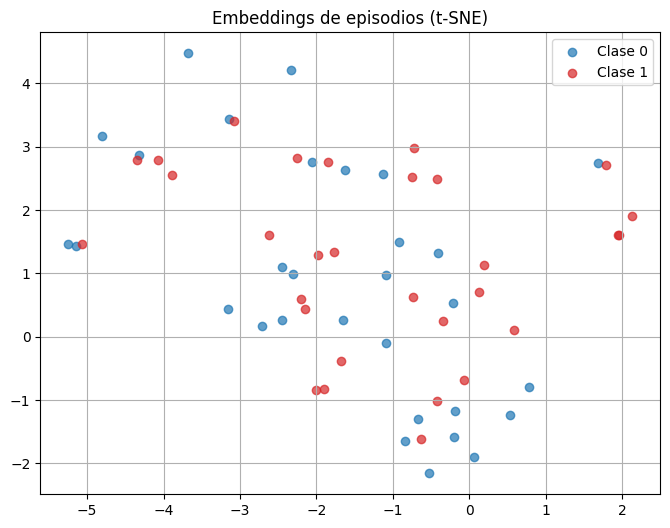

In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# # Crear un solo episodio con muchas muestras
# support_x, support_y, query_x, query_y = create_episode(X, y_np, n_ways=2, k_shots=10, q_queries=20)

# all_x = torch.cat([support_x, query_x])
# all_y = torch.cat([support_y, query_y])

# embeddings = model(all_x.to(device)).detach().cpu().numpy()

# # Reducción de dimensión
# X_2d = TSNE(n_components=2).fit_transform(embeddings)
# plt.figure(figsize=(8,6))
# plt.scatter(X_2d[:, 0], X_2d[:, 1], c=all_y, cmap='tab10', alpha=0.7)
# plt.title("Embeddings de episodios (t-SNE)")
# plt.colorbar()
# plt.show()

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

# Asegurarse de que 'device' está definido
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Crear un episodio binario
support_x, support_y, query_x, query_y = create_episode(X, y_np, n_ways=2, k_shots=10, q_queries=20)

# Unir todos los datos
all_x = torch.cat([support_x, query_x])
all_y = torch.cat([support_y, query_y])

# Obtener embeddings del modelo
embeddings = model(all_x.to(device)).detach().cpu().numpy()
all_y_np = all_y.cpu().numpy()  # Asegurarse de que esté en NumPy

# Reducción de dimensión
X_2d = TSNE(n_components=2, random_state=42).fit_transform(embeddings)

# Colores diferenciables: 0 = azul (#1f77b4), 1 = rojo (#d62728)
colors = ['#1f77b4', '#d62728']
plt.figure(figsize=(8,6))
for class_id in [0, 1]:
    idx = all_y_np == class_id
    plt.scatter(X_2d[idx, 0], X_2d[idx, 1], c=colors[class_id], label=f'Clase {class_id}', alpha=0.7)

plt.title("Embeddings de episodios (t-SNE)")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

# Evaluación en múltiples episodios
all_preds = []
all_true = []

for _ in range(100):  # número de episodios
    support_x, support_y, query_x, query_y = create_episode(X, y_np, n_ways, k_shots, q_queries)

    support_x, support_y = support_x.to(model.net[0].weight.device), support_y.to(model.net[0].weight.device)
    query_x, query_y = query_x.to(model.net[0].weight.device), query_y.to(model.net[0].weight.device)

    with torch.no_grad():
        support_embed = model(support_x)
        query_embed = model(query_x)

        # Calcular prototipos
        prototypes = []
        unique_classes = torch.unique(support_y)
        for cls in unique_classes:
            cls_embed = support_embed[support_y == cls]
            prototypes.append(cls_embed.mean(dim=0))
        prototypes = torch.stack(prototypes)

        # Clasificación
        dists = torch.cdist(query_embed, prototypes) ** 2
        log_p_y = F.log_softmax(-dists, dim=1)
        preds = log_p_y.argmax(dim=1)

        # Mapear query_y al índice de clase local (0, 1, ..., n_ways-1)
        query_labels = torch.tensor([unique_classes.tolist().index(lbl.item()) for lbl in query_y]).to(preds.device)

        all_preds.extend(preds.cpu().numpy())
        all_true.extend(query_labels.cpu().numpy())

# ----- 🧮 Reporte de métricas -----
print("=== Reporte por clase ===")
print(classification_report(all_true, all_preds, digits=4))

# ----- 📊 Matriz de confusión -----
cm = confusion_matrix(all_true, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de confusión (promedio en 100 episodios)")
plt.show()


One-shot

In [ ]:
# import numpy as np
# import torch
# from torch.utils.data import Dataset, DataLoader
# import torch.nn as nn
# import torch.nn.functional as F
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.model_selection import train_test_split
# from collections import defaultdict

# # Asumo que tienes:
# # X = features_filtered.values.astype(np.float32)
# # y_np = y.values

# # Escalado (ya hecho, pero lo pongo para contexto)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Codifica etiquetas
# y = LabelEncoder().fit_transform(y_np)

# # Divide en meta-train y meta-test
# X_meta_train, X_meta_test, y_meta_train, y_meta_test = train_test_split(
#     X, y, test_size=0.3, stratify=y, random_state=42
# )

# # Dataset para episodios one-shot
# class OneShotDataset(Dataset):
#     def __init__(self, X, y, n_way, n_query=5):
#         self.X = X
#         self.y = y
#         self.n_way = n_way          # número de clases por episodio
#         self.n_query = n_query      # número de queries por clase
#         self.cls_indices = defaultdict(list)

#         for xi, yi in zip(X, y):
#             self.cls_indices[int(yi)].append(xi)

#         # Convertimos las listas a numpy arrays para eficiencia
#         for cls in self.cls_indices:
#             self.cls_indices[cls] = np.stack(self.cls_indices[cls])

#     def __len__(self):
#         return 1000  # episodios por época

#     def __getitem__(self, idx):
#         support = []
#         query = []
#         classes = np.random.choice(list(self.cls_indices.keys()), self.n_way, replace=False)

#         for cls in classes:
#             samples = self.cls_indices[cls]
#             support_idx = np.random.choice(len(samples), size=1, replace=False)
#             query_idx = np.random.choice(len(samples), size=self.n_query, replace=False)

#             support.append(samples[support_idx[0]])
#             for q_idx in query_idx:
#                 query.append((samples[q_idx], cls))

#         support = torch.tensor(np.stack(support), dtype=torch.float32)
#         query_x = torch.tensor(np.stack([q[0] for q in query]), dtype=torch.float32)
#         query_y = torch.tensor([q[1] for q in query], dtype=torch.long)
#         return support, torch.tensor(classes), query_x, query_y

# # Modelo simple Prototypical Network
# class ProtoNet(nn.Module):
#     def __init__(self, input_dim, hidden_dim=64):
#         super().__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim, hidden_dim),
#             nn.ReLU(),
#             nn.Linear(hidden_dim, hidden_dim),
#             nn.ReLU(),
#         )

#     def forward(self, support, support_y, query):
#         z_sup = self.encoder(support)       # shape: (n_way, hidden_dim)
#         z_quer = self.encoder(query)        # shape: (n_way * n_query, hidden_dim)

#         prototypes = []
#         for cls in support_y:
#             prototypes.append(z_sup[support_y == cls].mean(0))
#         prototypes = torch.stack(prototypes)  # shape: (n_way, hidden_dim)

#         dists = torch.cdist(z_quer, prototypes)  # shape: (n_way*n_query, n_way)
#         return -dists  # logits para softmax

# # Entrenamiento
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# n_way = len(np.unique(y))
# n_query = 5

# train_ds = OneShotDataset(X_meta_train, y_meta_train, n_way, n_query)
# train_loader = DataLoader(train_ds, batch_size=1, shuffle=True)

# model = ProtoNet(X.shape[1]).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# loss_fn = nn.CrossEntropyLoss()

# for epoch in range(20):
#     model.train()
#     total_loss = 0
#     for support, support_y, query_x, query_y in train_loader:
#         support = support[0].to(device)
#         support_y = support_y[0].to(device)
#         query_x = query_x.to(device)
#         query_y = query_y.to(device)

#         # Mapea las etiquetas query a índices 0..n_way-1 según el soporte
#         class_to_idx = {cls.item(): idx for idx, cls in enumerate(support_y)}
#     #    query_y_mapped = torch.tensor([class_to_idx[y.item()] for y in query_y], device=device)
#         # print("support_y shape:", support_y.shape)
#         # print("query_y shape:", query_y.shape)
#         # print("query_y:", query_y)
#         # print("query_y elements:")
#         # for i, elem in enumerate(query_y):
#         #     print(f"elem {i}:", elem, type(elem), elem.shape if hasattr(elem, 'shape') else 'no shape')

#         query_y_flat = query_y.detach().cpu().numpy().flatten()
#         query_y_mapped_list = [class_to_idx[int(y)] for y in query_y_flat]
#         query_y_mapped = torch.tensor(query_y_mapped_list, device=device)

#         logits = model(support, support_y, query_x)
#         loss = loss_fn(logits, query_y_mapped)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # query_y_flat = np.array(query_y).flatten().tolist()  # aplana para obtener lista de ints
#         # query_y_mapped = torch.tensor([class_to_idx[int(y)] for y in query_y_flat], device=device)

#         # logits = model(support, support_y, query_x)
#         # loss = loss_fn(logits, query_y_mapped)

#         # optimizer.zero_grad()
#         # loss.backward()
#         # optimizer.step()

#         total_loss += loss.item()
#     print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# # Evaluación simple con un episodio
# model.eval()
# test_ds = OneShotDataset(X_meta_test, y_meta_test, n_way, n_query=1)
# support, support_y, query_x, query_y = test_ds[0]
# support, support_y, query_x = support.to(device), support_y.to(device), query_x.to(device)
# logits = model(support, support_y, query_x)
# preds = torch.argmax(logits, dim=1).cpu().numpy()

# from sklearn.metrics import classification_report
# true = query_y.numpy()
# print(classification_report(true, preds, target_names=[str(i) for i in support_y.cpu().numpy()]))


Contrastive Learning

In [ ]:
impute(extracted_features_total)
features_filtered = select_features(extracted_features_total, y)

X = features_filtered.values.astype(np.float32)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y_np = y.values

In [ ]:
class ContrastiveDataset(Dataset):
    def __init__(self, X):
        self.X = X

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]
        return torch.tensor(self.augment(x), dtype=torch.float32), torch.tensor(self.augment(x), dtype=torch.float32)

    def augment(self, x):
        x_aug = x + 0.05 * np.random.randn(*x.shape)
        mask = np.random.binomial(1, 0.9, size=x.shape)
        return x_aug * mask

X_train, X_val, _, _ = train_test_split(X, y_np, test_size=0.2, random_state=42)
train_loader = DataLoader(ContrastiveDataset(X_train), batch_size=128, shuffle=True)

##########MODELO

class MLPEncoder(nn.Module):
    def __init__(self, input_dim, projection_dim=64):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU()
        )
        self.projector = nn.Sequential(
            nn.Linear(128, projection_dim)
        )

    def forward(self, x):
        h = self.encoder(x)
        z = self.projector(h)
        return F.normalize(z, dim=1)

model = MLPEncoder(input_dim=X.shape[1]).to("cuda" if torch.cuda.is_available() else "cpu")
device = next(model.parameters()).device

####CONTRASTIVE LOSS

def nt_xent_loss(z1, z2, temperature=0.5):
    batch_size = z1.shape[0]
    z = torch.cat([z1, z2], dim=0)  # (2N, D)

    # Cosine similarity matrix
    sim_matrix = F.cosine_similarity(z.unsqueeze(1), z.unsqueeze(0), dim=2)  # (2N, 2N)

    # Mask to filter out self-similarity
    self_mask = torch.eye(2 * batch_size, device=z.device).bool()
    sim_matrix = sim_matrix.masked_fill(self_mask, -9e15)

    # Positive pairs: i-th in z1 with (i + N)-th in z2 and vice versa
    positives = torch.cat([torch.diag(sim_matrix, batch_size),
                           torch.diag(sim_matrix, -batch_size)], dim=0)

    # Labels (positives are at index 0)
    labels = torch.zeros(2 * batch_size, dtype=torch.long, device=z.device)

    # Compute logits
    logits = torch.cat([positives.unsqueeze(1), sim_matrix], dim=1)
    logits = logits / temperature

    loss = F.cross_entropy(logits, labels)
    return loss


####ENTRENAMIENTO

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
epochs = 20

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for x1, x2 in train_loader:
        x1, x2 = x1.to(device), x2.to(device)
        z1 = model(x1)
        z2 = model(x2)
        loss = nt_xent_loss(z1, z2)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(train_loader):.4f}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# 1. Usamos el encoder para extraer representaciones
model.eval()
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
with torch.no_grad():
    embeddings = model.encoder(X_tensor).cpu().numpy()

# 2. Dividir en train/test
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(
    embeddings, y_np, test_size=0.2, random_state=42, stratify=y_np
)

# 3. Clasificador supervisado
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_enc, y_train_enc)
y_pred = clf.predict(X_test_enc)

# 4. Métricas
acc = accuracy_score(y_test_enc, y_pred)
f1 = f1_score(y_test_enc, y_pred, average='weighted')  # Puedes usar 'macro' o 'micro' también

print("Accuracy:", acc)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred))


In [ ]:
# ----- 📊 Matriz de confusión -----
cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de confusión (promedio en 100 episodios)")
plt.show()


Jerarquico

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

# ————————————— Carga y preparación de datos —————————————
# (parte de tu código previo)
# WIP: carga extracted_features_total y y como en mensajes anteriores
# …

impute(extracted_features_total)
features_filtered = select_features(extracted_features_total, y)
X = features_filtered.values.astype(np.float32)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
y_np = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y_np, test_size=0.2, random_state=42, stratify=y_np)

#Clustering jerárquico (pseudolabels)
n_clusters = 2
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
pseudo_train = clusterer.fit_predict(X_train)
pseudo_test = clusterer.fit_predict(X_test)

#Combinación etiquetas reales y pseudolabels
# Usar solo una parte de etiquetas reales (ej: 20%) y pseudolabels para el resto
mask_labeled = np.random.rand(len(y_train)) < 0.3
y_train_semi = np.where(mask_labeled, y_train, pseudo_train)

###3Clasificador supervisado
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_semi)
y_pred = clf.predict(X_test)

#Evaluación final
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accurracy (semi):", acc)
print("F1 weighted (semi):", f1)
print("\nClassification Report (semi):\n", classification_report(y_test, y_pred))


In [ ]:
# ----- 📊 Matriz de confusión -----
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de confusión (promedio en 100 episodios)")
plt.show()


Mediante grafos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.neighbors import kneighbors_graph

# ————————————————— Preparación de datos —————————————————

# (asumes que extracted_features_total y y ya están cargados como en pasos previos)
impute(extracted_features_total)
features_filtered = select_features(extracted_features_total, y)
X = features_filtered.values.astype(np.float32)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
y_np = y.values

# Crear train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_np, test_size=0.2, random_state=42, stratify=y_np
)

# ————————————— Crear grafo local (k-NN) —————————————

k = 10  # vecinos locales
W = kneighbors_graph(X_train, n_neighbors=k, mode='connectivity', include_self=True)
W = 0.5 * (W + W.T)  # asegurar simetría

# ———————————— Preparar etiquetas semisupervisadas ————————————

# Ocultar algunas etiquetas (ej. 50% de train quedan sin etiqueta)
mask = np.random.rand(len(y_train)) < 0.5
y_train_semi = np.copy(y_train)
y_train_semi[mask] = -1  # -1 = sin etiqueta

# ———————————— Label Spreading en el grafo local ————————————

label_spread = LabelSpreading(kernel='knn', n_neighbors=k, alpha=0.2, max_iter=30)
label_spread.fit(X_train, y_train_semi)

# Predecir sobre test
y_pred_test = label_spread.predict(X_test)

# ————————————— Evaluación de rendimiento —————————————

acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='weighted')
print(f"AccuracyLabelSpreading: {acc:.4f}, F1 (weighted): {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
